In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re
import unicodedata
import nltk
from nltk import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords, wordnet
nltk.download('stopwords')
nltk.download('wordnet')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics

import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [102]:
df = pd.read_csv("/content/tash-pt.csv")
df

,id_twitter,sentiment,text
0,1067856049821155334,1,@tchaugip @n00bona História vence técnica faci...
1,1070902848957964288,1,@camandis aa obrigado perfeito o seu timing ti...
2,1073158858925838336,0,moldura artística favorita entre filistinos al...
3,1073220881344856064,0,Minha cama tá no localizada no meio nesse mome...
4,1073347140334833664,0,@eueduramos o mundo so vai mudar quando as pes...
...,...,...,...
2782,1068599890761129985,-1,@PastorMalafaia Concordo com Prof Olavo de Car...
2783,1071376463230840833,-1,@ClaudiaLeitte se o clipe de saudade não for g...
2784,1073978880787181568,1,agr o ar vai ficar ligado 24 por 48
2785,1074925265980145666,0,e eu que no meio de tantos problemas ainda con...


In [103]:
df.drop('id_twitter', inplace = True, axis = 1) #deletando coluna 'id_twitter'
df.head()

,sentiment,text
0,1,@tchaugip @n00bona História vence técnica faci...
1,1,@camandis aa obrigado perfeito o seu timing ti...
2,0,moldura artística favorita entre filistinos al...
3,0,Minha cama tá no localizada no meio nesse mome...
4,0,@eueduramos o mundo so vai mudar quando as pes...


In [104]:
df.isnull().sum()

sentiment    0
text         0
dtype: int64

In [105]:
df.drop_duplicates() #deletando também duplicatas, se existirem
df.shape

(2787, 2)

In [106]:
df['sentiment'].value_counts()

 0    1018
 1     888
-1     881
Name: sentiment, dtype: int64

In [107]:
#deletando os nomes de usuário
def user_clean(text):
    res = re.sub("@[^ ]+", "", text)
    return res

for i in df.index:
    texto = df['text'][i]
    df['text'][i] = user_clean(texto)

df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,sentiment,text
0,1,História vence técnica facilmente. A menos q...
1,1,aa obrigado perfeito o seu timing tinha acaba...
2,0,moldura artística favorita entre filistinos al...
3,0,Minha cama tá no localizada no meio nesse mome...
4,0,o mundo so vai mudar quando as pessoas entend...
...,...,...
2782,-1,Concordo com Prof Olavo de Carvalho. O Escola...
2783,-1,se o clipe de saudade não for gravado no Pelo...
2784,1,agr o ar vai ficar ligado 24 por 48
2785,0,e eu que no meio de tantos problemas ainda con...


In [108]:
#removendo acentos e caracteres especiais
def f_clean(df, text):
    df['text'] = df['text'].replace(regex='[!/,.-]',value='').apply(lambda x: unicodedata.normalize('NFKD', x).encode('ascii','ignore').decode("utf-8"))
    return df
                                                                    
f_clean(df, df['text'])
print('\n',df['text'][0])
print('\n',df['text'][9])


   Historia vence tecnica facilmente A menos que seja algo experimental que traga algo muito diferente e novo pois ai agrega ao panteao de tecnicas e entao e lembrado Caso contrario e so execucao

 viado eu to apaixonado pelo   nao da amo um artista


In [109]:
#removendo stopwords
def f_stopwords(df, text):
    stop_words = stopwords.words('portuguese')
    df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
    return df

f_stopwords(df, df['text'])
print('\n',df['text'][0])
print('\n',df['text'][9])


 Historia vence tecnica facilmente A menos algo experimental traga algo diferente novo pois ai agrega panteao tecnicas entao lembrado Caso contrario so execucao

 viado to apaixonado nao amo artista


In [110]:
df['sentiment'] = df['sentiment'].apply(lambda x: int(x))

tweet = df['text']
sentiment = np.asarray(df['sentiment'])

np.unique(sentiment)

array([-1,  0,  1])

In [111]:
count_vect = CountVectorizer()
X_train = count_vect.fit_transform(tweet)

tfidf_transformer = TfidfTransformer()
X_train_transform = tfidf_transformer.fit_transform(X_train)
X_train_transform.shape

(2787, 11254)

In [112]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train_transform, sentiment, test_size=0.3)

# Aplicando naive bayes
clf = MultinomialNB().fit(X_train, Y_train)
predicted = clf.predict(X_test)

print(metrics.classification_report(Y_test, predicted))


              precision    recall  f1-score   support

          -1       0.43      0.48      0.45       255
           0       0.45      0.49      0.47       321
           1       0.48      0.37      0.42       261

    accuracy                           0.45       837
   macro avg       0.45      0.45      0.45       837
weighted avg       0.45      0.45      0.45       837



In [113]:
def pre_X(frases):
    lista = []
    for frase in frases:
        lista.append(frase)
    return lista

def pre_Y(number):
    lista = []
    for numb in number:
        lista.append(numb)
    return lista

In [114]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='tanh'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3 , activation='softmax')
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

In [115]:
tweet

0       Historia vence tecnica facilmente A menos algo...
1       aa obrigado perfeito timing acabado dar 18 min...
2       moldura artistica favorita filistinos alto pad...
3       Minha cama ta localizada meio nesse momento qu...
4       mundo so vai mudar pessoas entenderem nao deve...
                              ...                        
2782    Concordo Prof Olavo Carvalho O Escola Partido ...
2783    clipe saudade nao gravado Pelourinho desisto v...
2784                        agr ar vai ficar ligado 24 48
2785    meio tantos problemas ainda consigo pensar dia...
2786                          Ue ser gentil nao ser falso
Name: text, Length: 2787, dtype: object

In [116]:
sentiment

array([1, 1, 0, ..., 1, 0, 0])

In [117]:
one = OneHotEncoder(sparse=False)

y_one = one.fit_transform(Y_train.reshape(-1,1))

In [118]:
fit = model.fit(X_train.todense(), y_one, epochs=25, validation_data=(X_test.todense(), one.transform(Y_test.reshape(-1,1))))

Epoch 1/25
61/61 [==============================] - 1s 11ms/step - loss: 1.0983 - accuracy: 0.3484 - val_loss: 1.0945 - val_accuracy: 0.3859
Epoch 2/25
61/61 [==============================] - 0s 7ms/step - loss: 1.0785 - accuracy: 0.4468 - val_loss: 1.0796 - val_accuracy: 0.4146
Epoch 3/25
61/61 [==============================] - 0s 7ms/step - loss: 0.9375 - accuracy: 0.6757 - val_loss: 1.0786 - val_accuracy: 0.4373
Epoch 4/25
61/61 [==============================] - 0s 7ms/step - loss: 0.5716 - accuracy: 0.8201 - val_loss: 1.2018 - val_accuracy: 0.4504
Epoch 5/25
61/61 [==============================] - 0s 8ms/step - loss: 0.2963 - accuracy: 0.9286 - val_loss: 1.4123 - val_accuracy: 0.4170
Epoch 6/25
61/61 [==============================] - 0s 8ms/step - loss: 0.1617 - accuracy: 0.9582 - val_loss: 1.5771 - val_accuracy: 0.4456
Epoch 7/25
61/61 [==============================] - 0s 8ms/step - loss: 0.0957 - accuracy: 0.9835 - val_loss: 1.7462 - val_accuracy: 0.4492
Epoch 8/25
61/61 [=

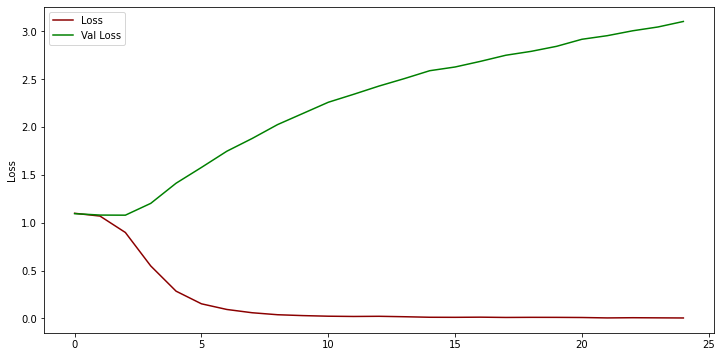

In [119]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['loss'], label='Loss', color='darkred')
plt.plot(fit.history['val_loss'], label='Val Loss', color='green')
plt.legend()
plt.ylabel('Loss')
plt.show()

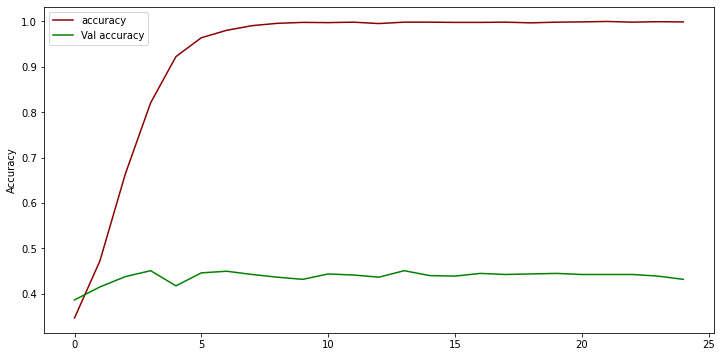

In [120]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['accuracy'], label='accuracy', color='darkred')
plt.plot(fit.history['val_accuracy'], label='Val accuracy', color='green')
plt.legend()
plt.ylabel('Accuracy')
plt.show()

In [121]:
acc = model.evaluate(X_test.todense(), one.transform(Y_test.reshape(-1,1)))

27/27 [==============================] - 0s 3ms/step - loss: 3.1012 - accuracy: 0.4313


In [122]:
def Tokenize(f):     ## Pre-processando a frase
    
    ## Colocando em minusculo
    ## Retirando a pontuaçao
    ## Retirando as StopWords
    
    f = f.lower().replace('\n', '').replace('-','').replace('#','').replace('.','').replace(',','').replace('!','').replace('r\n','').replace('  ','')
    token = RegexpTokenizer(r"\w+")
    f = token.tokenize(f)
    
    stop_words = set(stopwords.words('portuguese'))
    
    new_word = [word for word in f if not word in stop_words]
    
    return ' '.join(new_word)
    
def set_array(frases):    
    vocab = []
    palavras = []
    for frase in frases:
        
        text_array = user_clean(frase)
        text_array = Tokenize(text_array)
        text_array = text_array.split(' ')
        for i in range(len(text_array)):
            vocab.append(text_array[i])
      
    return vocab

vectorize_layer = TextVectorization(
 max_tokens=15000,
 output_mode='int',
 output_sequence_length=len(max(df['text'])))

vocab = set_array(df['text'])

vectorize_layer.adapt(np.unique(vocab))
len(vectorize_layer.get_vocabulary())

11191

In [123]:
model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(
        input_dim=len(vectorize_layer.get_vocabulary()),
        output_dim=64,mask_zero=True),
    
    tf.keras.layers.LSTM(50, activation='relu' ,return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.LSTM(25 , activation='tanh', return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.LSTM(10 , activation='tanh'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(3, activation='softmax')
])


model.compile(
    optimizer= tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

In [126]:
X_train, X_test, Y_train, Y_test = train_test_split(tweet, polarity, test_size=0.3)

In [127]:
y_one = one.fit_transform(Y_train.reshape(-1,1))

In [128]:
fit = model.fit(np.asarray(pre_X(X_train)), y_one, epochs=20, batch_size=128 ,validation_data=(np.asarray(pre_X(X_test)), one.transform(Y_test.reshape(-1,1))))

Epoch 1/20
16/16 [==============================] - 24s 878ms/step - loss: 1.0984 - accuracy: 0.3571 - val_loss: 1.0963 - val_accuracy: 0.3763
Epoch 2/20
16/16 [==============================] - 11s 715ms/step - loss: 1.0938 - accuracy: 0.4033 - val_loss: 1.0980 - val_accuracy: 0.3417
Epoch 3/20
16/16 [==============================] - 11s 714ms/step - loss: 1.0806 - accuracy: 0.5119 - val_loss: 1.0948 - val_accuracy: 0.3728
Epoch 4/20
16/16 [==============================] - 11s 721ms/step - loss: 0.9466 - accuracy: 0.5842 - val_loss: 1.3737 - val_accuracy: 0.3596
Epoch 5/20
16/16 [==============================] - 11s 720ms/step - loss: 0.7572 - accuracy: 0.6034 - val_loss: 1.4585 - val_accuracy: 0.3572
Epoch 6/20
16/16 [==============================] - 11s 719ms/step - loss: 0.6280 - accuracy: 0.6643 - val_loss: 1.6772 - val_accuracy: 0.3393
Epoch 7/20
16/16 [==============================] - 12s 722ms/step - loss: 0.5975 - accuracy: 0.6424 - val_loss: 1.7938 - val_accuracy: 0.3728

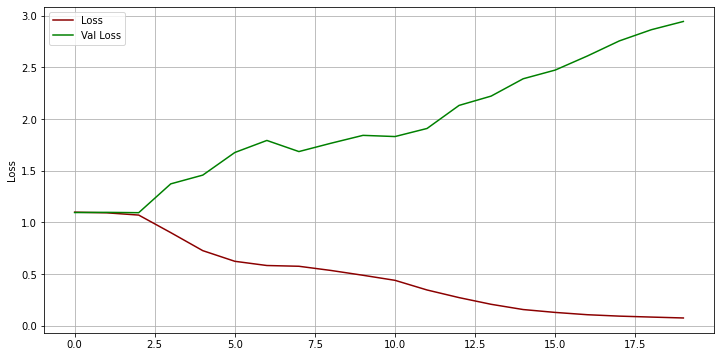

In [129]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['loss'], label='Loss', color='darkred')
plt.plot(fit.history['val_loss'], label='Val Loss', color='green')
plt.legend()
plt.grid()
plt.ylabel('Loss')
plt.show()

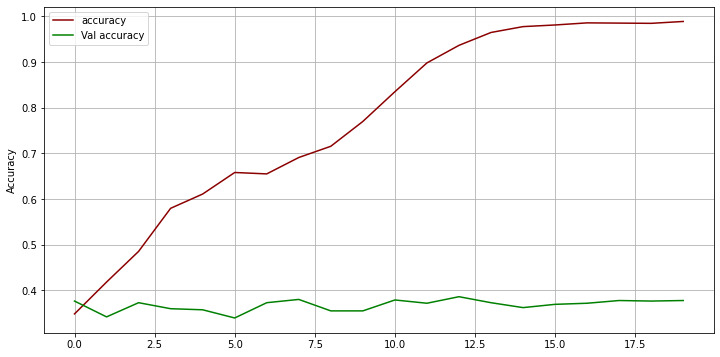

In [130]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['accuracy'], label='accuracy', color='darkred')
plt.plot(fit.history['val_accuracy'], label='Val accuracy', color='green')
plt.legend()
plt.grid()
plt.ylabel('Accuracy')
plt.show()

In [131]:
acc = model.evaluate(np.asarray(pre_X(X_test)), one.transform(Y_test.reshape(-1,1)))

27/27 [==============================] - 2s 78ms/step - loss: 2.9450 - accuracy: 0.3775
